<h1>Crop Yield Prediction Using Knn Algorithm</h2> 

<h2>Importing packages</h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import math

<h3>Loading Data</h3>

In [2]:
data=pd.read_csv("dataset.csv")

<h3>Printing First 5 rows</h3>

In [3]:
data.head()

,state,district,year,Season,crop,area,production
0,Telangana,ADILABAD,1997,Kharif,Arhar/Tur,32200.0,1100.0
1,Telangana,ADILABAD,1997,Kharif,Castor seed,2600.0,700.0
2,Telangana,ADILABAD,1997,Kharif,Cotton(lint),144900.0,66500.0
3,Telangana,ADILABAD,1997,Kharif,Dry chillies,5500.0,3100.0
4,Telangana,ADILABAD,1997,Kharif,Jowar,58200.0,31500.0


In [4]:
data.shape

(5649, 7)

In [5]:
data.dtypes

state          object
district       object
year            int64
Season         object
crop           object
area          float64
production    float64
dtype: object

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5649.0,2005.152947,4.912295,1997.0,2001.0,2004.0,2009.0,2014.0
area,5649.0,14402.659586,33331.469719,1.0,225.0,1600.0,11001.0,361169.0
production,5591.0,59944.183509,457963.051678,0.0,200.0,2000.0,17036.5,11933140.0


In [7]:
data.isnull().sum()

state          0
district       0
year           0
Season         0
crop           0
area           0
production    58
dtype: int64

In [8]:
data['Season'].value_counts()

Kharif         2367
Rabi           2198
Whole Year     1084
Name: Season, dtype: int64

In [9]:
k=data['crop'].value_counts()
print(k)

Rice                 313
Maize                306
Jowar                298
Groundnut            295
Dry chillies         290
                    ... 
Peas  (vegetable)      8
Tapioca                5
Varagu                 2
Other Dry Fruit        1
other fibres           1
Name: crop, Length: 65, dtype: int64


In [10]:
data.columns

Index(['state', 'district', 'year', 'Season', 'crop', 'area', 'production'], dtype='object')

In [11]:
data=data.drop('state',axis=1)

In [12]:
data['district'].value_counts()

MEDAK          714
RANGAREDDI     693
MAHBUBNAGAR    666
NIZAMABAD      650
ADILABAD       650
KHAMMAM        592
KARIMNAGAR     582
WARANGAL       573
NALGONDA       521
HYDERABAD        8
Name: district, dtype: int64

In [13]:
k.shape

(65,)

In [14]:
data.shape

(5649, 6)

In [15]:
data.dtypes

district       object
year            int64
Season         object
crop           object
area          float64
production    float64
dtype: object

In [16]:
data.Season=data.Season.map({"Rabi       ":1,"Kharif     ":0,"Whole Year ":2})
l2=[]
l2.append("Rabi       ")
l2.append("Kharif     ")
l2.append("Whole Year ")

In [17]:
data.head()

,district,year,Season,crop,area,production
0,ADILABAD,1997,0,Arhar/Tur,32200.0,1100.0
1,ADILABAD,1997,0,Castor seed,2600.0,700.0
2,ADILABAD,1997,0,Cotton(lint),144900.0,66500.0
3,ADILABAD,1997,0,Dry chillies,5500.0,3100.0
4,ADILABAD,1997,0,Jowar,58200.0,31500.0


In [18]:
dist={}
l=[]
count=0
# dist1={}
for i in data['district']:
    if dist.get(i)==None:
        dist[i]=count
        count=count+1
        l.append(i)
print(dist)

{'ADILABAD': 0, 'HYDERABAD': 1, 'KARIMNAGAR': 2, 'KHAMMAM': 3, 'MAHBUBNAGAR': 4, 'MEDAK': 5, 'NALGONDA': 6, 'NIZAMABAD': 7, 'RANGAREDDI': 8, 'WARANGAL': 9}


In [19]:
data.district=data.district.map(dist)

In [20]:
data.tail()

,district,year,Season,crop,area,production
5644,9,2014,1,Sunflower,21.0,30.0
5645,9,2014,1,Sweet potato,42.0,326.0
5646,9,2014,1,Tobacco,70.0,137.0
5647,9,2014,1,Urad,1494.0,607.0
5648,9,2014,2,Coriander,38.0,9.0


In [21]:
dist1={}
count1=0
l1=[]
# dist1={}
for i in data['crop']:
    if dist1.get(i)==None:
        dist1[i]=count1
        count1=count1+1
        l1.append(i)
print(dist1)

{'Arhar/Tur': 0, 'Castor seed': 1, 'Cotton(lint)': 2, 'Dry chillies': 3, 'Jowar': 4, 'Maize': 5, 'Moong(Green Gram)': 6, 'Other Kharif pulses': 7, 'Rice': 8, 'Sesamum': 9, 'Sugarcane': 10, 'Sunflower': 11, 'Urad': 12, 'Gram': 13, 'Groundnut': 14, 'Horse-gram': 15, 'Other  Rabi pulses': 16, 'Wheat': 17, 'Bajra': 18, 'Tobacco': 19, 'Masoor': 20, 'Linseed': 21, 'Rapeseed &Mustard': 22, 'Safflower': 23, 'Onion': 24, 'other misc. pulses': 25, 'Samai': 26, 'Small millets': 27, 'Varagu': 28, 'Banana': 29, 'Cashewnut': 30, 'Coriander': 31, 'Potato': 32, 'Sweet potato': 33, 'Turmeric': 34, 'Ragi': 35, 'Soyabean': 36, 'other oilseeds': 37, 'Beans & Mutter(Vegetable)': 38, 'Bhindi': 39, 'Bottle Gourd': 40, 'Brinjal': 41, 'Cabbage': 42, 'Citrus Fruit': 43, 'Cucumber': 44, 'Mango': 45, 'Orange': 46, 'other fibres': 47, 'Other Fresh Fruits': 48, 'Other Vegetables': 49, 'Pome Fruit': 50, 'Tomato': 51, 'Garlic': 52, 'Mesta': 53, 'Cowpea(Lobia)': 54, 'Ginger': 55, 'Dry ginger': 56, 'Grapes': 57, 'Cocon

In [22]:
data.crop=data.crop.map(dist1)

In [23]:
data.head()

,district,year,Season,crop,area,production
0,0,1997,0,0,32200.0,1100.0
1,0,1997,0,1,2600.0,700.0
2,0,1997,0,2,144900.0,66500.0
3,0,1997,0,3,5500.0,3100.0
4,0,1997,0,4,58200.0,31500.0


In [24]:
data.dtypes

district        int64
year            int64
Season          int64
crop            int64
area          float64
production    float64
dtype: object

In [25]:
data

,district,year,Season,crop,area,production
0,0,1997,0,0,32200.0,1100.0
1,0,1997,0,1,2600.0,700.0
2,0,1997,0,2,144900.0,66500.0
3,0,1997,0,3,5500.0,3100.0
4,0,1997,0,4,58200.0,31500.0
...,...,...,...,...,...,...
5644,9,2014,1,11,21.0,30.0
5645,9,2014,1,33,42.0,326.0
5646,9,2014,1,19,70.0,137.0
5647,9,2014,1,12,1494.0,607.0


In [26]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
district,5649.0,4.878563,2.762196,0.0,3.0,5.0,7.0,9.0
year,5649.0,2005.152947,4.912295,1997.0,2001.0,2004.0,2009.0,2014.0
Season,5649.0,0.772880,0.747944,0.0,0.0,1.0,1.0,2.0
crop,5649.0,16.501328,14.542444,0.0,5.0,12.0,24.0,64.0
area,5649.0,14402.659586,33331.469719,1.0,225.0,1600.0,11001.0,361169.0
production,5591.0,59944.183509,457963.051678,0.0,200.0,2000.0,17036.5,11933140.0


In [27]:
data.production.fillna(np.random.randint(0,11933140),inplace=True)

In [28]:
avg=59944.183509/14402.659586
print(avg)

4.162021823196342


In [29]:
avg=59944.183509/14402.659586
y=[]
area=data['area']
index=0
for i in data['production']:
    if i/area[index]>=avg:
        y.append(1)
    else:
        y.append(0)
    index=index+1
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 

<AxesSubplot:>

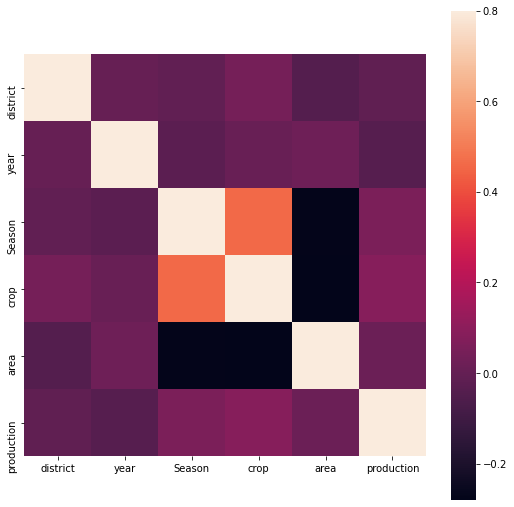

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [31]:
x = data.iloc[:, [0,1,2,3,4]].values
# y = data.iloc[:, 5].values

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred = classifier.predict(x_test)

In [35]:
print(y_pred)

[0 0 0 ... 0 0 1]


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix:::","\n",confusion_matrix(y_test, y_pred))
print("\n")
print("classification report:::","\n",classification_report(y_test, y_pred))

Confusion matrix::: 
 [[882  53]
 [132  63]]


classification report::: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       935
           1       0.54      0.32      0.41       195

    accuracy                           0.84      1130
   macro avg       0.71      0.63      0.66      1130
weighted avg       0.81      0.84      0.82      1130



In [37]:
x_new = [[0,2000,0,4,8000],[3,2022,2,61,100]]
y_predict = classifier.predict(x_new)

print(y_predict[0])
print(y_predict[1])

0
0


In [38]:
print(l1)

['Arhar/Tur', 'Castor seed', 'Cotton(lint)', 'Dry chillies', 'Jowar', 'Maize', 'Moong(Green Gram)', 'Other Kharif pulses', 'Rice', 'Sesamum', 'Sugarcane', 'Sunflower', 'Urad', 'Gram', 'Groundnut', 'Horse-gram', 'Other  Rabi pulses', 'Wheat', 'Bajra', 'Tobacco', 'Masoor', 'Linseed', 'Rapeseed &Mustard', 'Safflower', 'Onion', 'other misc. pulses', 'Samai', 'Small millets', 'Varagu', 'Banana', 'Cashewnut', 'Coriander', 'Potato', 'Sweet potato', 'Turmeric', 'Ragi', 'Soyabean', 'other oilseeds', 'Beans & Mutter(Vegetable)', 'Bhindi', 'Bottle Gourd', 'Brinjal', 'Cabbage', 'Citrus Fruit', 'Cucumber', 'Mango', 'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables', 'Pome Fruit', 'Tomato', 'Garlic', 'Mesta', 'Cowpea(Lobia)', 'Ginger', 'Dry ginger', 'Grapes', 'Coconut ', 'Papaya', 'Tapioca', 'Korra', 'Peas  (vegetable)', 'Niger seed', 'Other Dry Fruit']


In [39]:
print(l)

['ADILABAD', 'HYDERABAD', 'KARIMNAGAR', 'KHAMMAM', 'MAHBUBNAGAR', 'MEDAK', 'NALGONDA', 'NIZAMABAD', 'RANGAREDDI', 'WARANGAL']


In [40]:
suggest=x_new[0]
print(suggest)
for i in range(0,len(y)):
    if y[i]==1 and data['district'][i]==suggest[0] and data['Season'][i]==suggest[2]:
        print(l1[data['crop'][i]]+"is good in year ",data["year"][i])

[0, 2000, 0, 4, 8000]
Sugarcaneis good in year  1997
Onionis good in year  2000
Onionis good in year  2003
Small milletsis good in year  2003
Mestais good in year  2005
Onionis good in year  2005
Onionis good in year  2006
Sesamumis good in year  2007
Maizeis good in year  2008
Mestais good in year  2009
Maizeis good in year  2010
Sugarcaneis good in year  2013
Turmericis good in year  2013
Bananais good in year  2014
Gingeris good in year  2014
Onionis good in year  2014
Sugarcaneis good in year  2014
Turmericis good in year  2014
